# Machine Learning Model - Feature Engineering (Tổng hợp biến phái sinh)

In [1]:
# Ví dụ dữ liệu Nominal và Ordinal
# Ví dụ dữ liệu Nominal
arr2 = ['bò sát', 'có vú', 'gia cầm', 'giáp xác']

# Ví dụ biến dạng Ordinal
# Trình độ học vấn
arr = ['cấp 1', 'cấp 2', 'cấp 3', 'đại học', 'sau đại học'] # => sự sắp xếp nhất định
arr_int = [1, 2, 3, 4, 5]

# Cấp bậc trong công ty
arr1 = ['nhân viên', 'nhóm trưởng', 'trưởng phòng', 'giám đốc chi nhánh', 'giám đốc vùng'] # => thứ tự nhất định

# Nominal dữ liệu chữ nhưng ko có giá trị để sắp xếp


In [2]:
# Biến dạng số
# Continuous - liên tục
# Số thập phân 
# 0.1 0.11 0.111 0.112 0.1111

# Discrete - rời rạc
# Số nguyên
# 1 2 3 4 5 6

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dữ liệu Titanic

In [4]:
titanic = sns.load_dataset('titanic')
display(titanic.info(), titanic.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# titanic = titanic.drop(columns=['survived', 'pclass', 'embarked', 'who', 'adult_male', 'alone'])
# titanic

## Kiểm tra chất lượng dữ liệu

In [6]:
titanic.isnull().sum() # Python True = 1, False = 0

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Xử lý chất lượng dữ liệu

### Thuyết âm mưu 1: Deck theo hạng vé

In [7]:
titanic.pivot_table(
    index='deck',
    columns='pclass',
    values='survived',
    aggfunc='count'
).fillna(0)

pclass,1,2,3
deck,,,
A,15,0,0
B,47,0,0
C,59,0,0
D,29,4,0
E,25,4,3
F,0,8,5
G,0,0,4


<AxesSubplot:xlabel='deck', ylabel='count'>

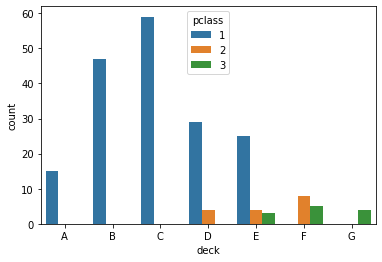

In [8]:
sns.countplot(data=titanic, x='deck', hue='pclass')

In [9]:
# Logic điền: 1class = C, 2class = F, 3class = F

In [10]:
deck_dict = {
    1: 'C',
    2: 'F',
    3: 'F'
}
ser = titanic['pclass'].map(deck_dict) # pandas series mới, chưa gán đè lên dữ liệu cũ
ser

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    C
888    F
889    C
890    F
Name: pclass, Length: 891, dtype: object

In [11]:
new_deck = titanic['deck'].combine_first(ser)
new_deck

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [12]:
new_deck.isnull().sum()

0

In [13]:
titanic['deck'] = new_deck

In [14]:
# Fillna for deck: một cách khác

In [15]:
titanic['deck'].value_counts(dropna=False)

F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: deck, dtype: int64

In [16]:
titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck']

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [17]:
titanic['deck'].fillna('Unknown')

0      F
1      C
2      F
3      C
4      F
      ..
886    F
887    B
888    F
889    C
890    F
Name: deck, Length: 891, dtype: category
Categories (8, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown']

In [18]:
titanic['deck'] = titanic['deck'].fillna('Unknown')

In [19]:
titanic['deck'].isnull().sum()

0

### Thuyết âm mưu 02: Embark Town

In [20]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    644
Cherbourg      168
Queenstown      77
NaN              2
Name: embark_town, dtype: int64

In [21]:
filter1 = titanic['embark_town'].isnull() # lọc các bản ghi bị thiếu dữ liệu embark_town
titanic[filter1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [22]:
titanic['embark_town'].fillna('Unknown') # No brainer (ít quan sát bị thiếu)

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

In [23]:
filter1 = (titanic['who'] == 'woman') 
filter2 = (titanic['class'] == 'First')
# filter3 = (titanic['fare'] == 80)
ser = titanic[filter1 & filter2]
ser

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,C,Southampton,yes,False
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False


In [24]:
ser['embark_town'].value_counts() # mặc định sẽ thể hiện giá trị lớn nhất trên cùng .index[0]

Southampton    45
Cherbourg      43
Queenstown      1
Name: embark_town, dtype: int64

In [25]:
most_pop_town = ser['embark_town'].value_counts().idxmax()
most_pop_town

'Southampton'

In [26]:
titanic['embark_town'] = titanic['embark_town'].fillna(most_pop_town)

In [27]:
titanic['embark_town'].value_counts(dropna=False)

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [28]:
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')

In [29]:
titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

### Thuyết âm mưu 03: Điền tuổi

In [30]:
titanic['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [31]:
titanic['age'].isnull().sum() / len(titanic['age'])

0.19865319865319866

<AxesSubplot:xlabel='age', ylabel='Count'>

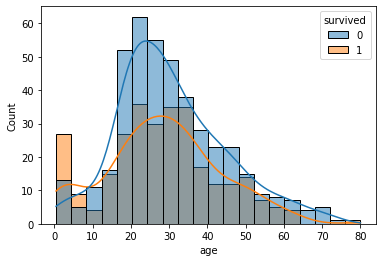

In [32]:
sns.histplot(titanic, x='age', hue='survived', kde=True)
# sns.<tên của plot>(
#     <bộ dữ liệu>, 
#     x=<cột dữ liệu x>, 
#     y=<cột dữ liệu y>, 
#     hue=<cột dữ liệu để phân loại>, 
#     kde=True # để vẽ đường cong thể hiện phân phối (đường cong đẹp đẹp)
# )

<AxesSubplot:xlabel='age', ylabel='fare'>

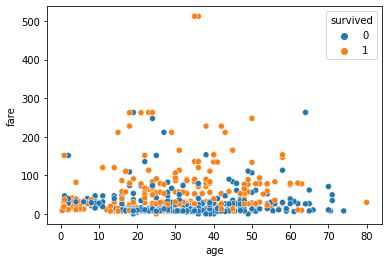

In [33]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived')

In [34]:
titanic['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [35]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [36]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

<AxesSubplot:xlabel='age', ylabel='parch'>

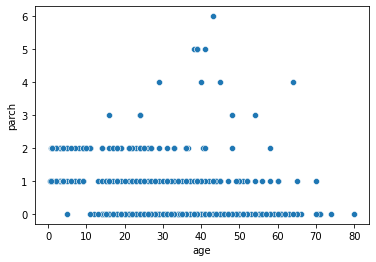

In [37]:
sns.scatterplot(data=titanic, x='age', y='parch')

<AxesSubplot:xlabel='parch', ylabel='age'>

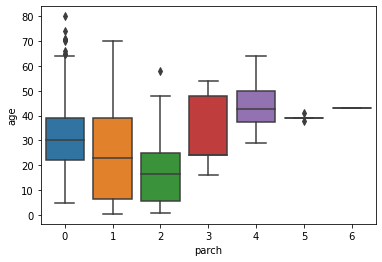

In [38]:
sns.boxplot(data=titanic, x='parch', y='age')
# Biểu đồ dạng nến:
# đường trên cùng của nên ~ 90%
# dưới cùng ~ 10%
# Trong hộp: bên trên là 75% bên dưới là 25% và ở giữa là 50% 
# Khoảng cách về giá trị giữa 25% - 75% gọi là IQR (InterQuartileRange)

In [39]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg(lambda x: x.isnull().sum()/len(x))
# Tính tỷ lệ số lượng bản ghi bị thiếu dữ liệu cho mỗi phân loại

who    sibsp  parch
child  0      0        0.000000
              1        0.000000
              2        0.000000
       1      0        0.000000
              1        0.000000
              2        0.000000
       2      1        0.000000
              2        0.000000
       3      1        0.000000
              2        0.000000
       4      1        0.000000
              2        0.000000
       5      2        0.000000
man    0      0        0.260976
              1        0.000000
              2        0.000000
       1      0        0.118644
              1        0.095238
              2        0.200000
              3        0.000000
              4        0.000000
              5        0.000000
       2      0        0.153846
              1        0.000000
       3      1        1.000000
              2        0.000000
       4      1        0.000000
       8      2        1.000000
woman  0      0        0.214876
              1        0.055556
              2     

In [40]:
titanic.groupby(['who', 'sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])
# Lấy ra thông tin số lượng bản ghi cho mỗi nhóm
# Độ tuổi trung bình cho mỗi nhóm
# Tỷ lệ bị thiếu của mỗi nhóm

len       mean  <lambda_0>
who   sibsp parch                            
child 0     0        6  12.166667    0.000000
            1        8   6.052500    0.000000
            2        9   4.981111    0.000000
      1     0        5  13.900000    0.000000
            1       15   4.566667    0.000000
            2        7   5.274286    0.000000
      2     1        5   2.300000    0.000000
            2        1   9.000000    0.000000
      3     1        3   4.333333    0.000000
            2        4   6.250000    0.000000
      4     1        8   5.625000    0.000000
            2        8   6.125000    0.000000
      5     2        4   8.750000    0.000000
man   0     0      410  32.973597    0.260976
            1       12  38.583333    0.000000
            2        5  35.800000    0.000000
      1     0       59  32.701923    0.118644
            1       21  36.000000    0.095238
            2        5  30.750000    0.200000
            3        1  16.000000    0.000000
            4        2  52.000000    0.000000
            5        1  39.000000    0.000000
      2     0       13  31.181818    0.153846
            1        1  23.000000    0.000000
      3     1        1        NaN    1.000000
            2        1  19.000000    0.000000
      4     1        1  16.000000    0.000000
      8     2        4        NaN    1.000000
woman 0     0      121  31.084211    0.214876
            1       18  34.176471    0.055556
            2       15  26.833333    0.200000
            3        1  24.000000    0.000000
            4        1  29.000000    0.000000
            5        2  40.000000    0.000000
      1     0       59  33.355556    0.237288
            1       21  35.450000    0.047619
            2        7  31.333333    0.142857
            3        2  51.000000    0.000000
            4        1  45.000000    0.000000
            5        2  38.500000    0.000000
            6        1  43.000000    0.000000
      2     0        3  35.500000    0.333333
            1        1  24.000000    0.000000
            2        3  20.000000    0.000000
            3        1  24.000000    0.000000
      3     0        2  31.500000    0.000000
            1        3        NaN    1.000000
            2        2  23.500000    0.000000
      4     2        1  17.000000    0.000000
      5     2        1  16.000000    0.000000
      8     2        3        NaN    1.000000

In [41]:
ser = titanic.groupby(['who', 'sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean())) 
# điền các giá trị bị thiếu bằng giá trị trung bình của nhóm
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [42]:
ser.isnull().sum()

11

In [43]:
titanic['age'] = ser

In [44]:
titanic.groupby(['sibsp', 'parch'])['age'].agg([len, 'mean', lambda x: (x.isnull().sum())/len(x)])

len       mean  <lambda_0>
sibsp parch                            
0     0      537  32.315390    0.000000
      1       38  29.647276    0.000000
      2       29  21.597586    0.000000
      3        1  24.000000    0.000000
      4        1  29.000000    0.000000
      5        2  40.000000    0.000000
1     0      123  32.251148    0.000000
      1       57  27.525439    0.000000
      2       19  21.579123    0.000000
      3        3  39.333333    0.000000
      4        3  49.666667    0.000000
      5        3  38.666667    0.000000
      6        1  43.000000    0.000000
2     0       16  31.991477    0.000000
      1        7   8.357143    0.000000
      2        4  17.250000    0.000000
      3        1  24.000000    0.000000
3     0        2  31.500000    0.000000
      1        7   4.333333    0.571429
      2        7  13.000000    0.000000
4     1        9   6.777778    0.000000
      2        9   7.333333    0.000000
5     2        5  10.200000    0.000000
8     2        7        NaN    1.000000

In [45]:
ser = titanic.groupby(['sibsp', 'parch'])['age'].apply(lambda x: x.fillna(x.mean()))
ser

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    31.333333
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [46]:
ser.isnull().sum()

7

In [47]:
titanic['age'] = ser

In [48]:
titanic['age'].isnull().sum()

7

In [49]:
child_avg_age = titanic[titanic['who'] == 'child']['age'].mean()
child_avg_age

6.369518072289156

In [50]:
titanic['age'] = titanic['age'].fillna(child_avg_age)

In [51]:
titanic['age'].isnull().sum()

0

In [52]:
# Dien du lieu bi thieu bang tep sisp va parch lon nhat

## Tạo biến mới

### Chia bin dữ liệu

<AxesSubplot:xlabel='age', ylabel='Probability'>

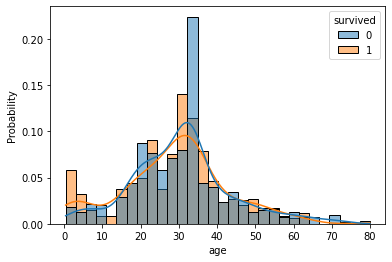

In [53]:
sns.histplot(
    data=titanic, 
    x='age', 
    hue='survived', # Chia biểu đồ thành 02 biểu đồ dạng chồng lên nhau
    kde=True, 
    stat='probability', # Tính tỷ lệ phần trăm thay vì đếm
    common_norm=False # Tính tỷ lệ cho từng phân loại thay vì tính cho chung toàn bộ dữ liệu
)

In [54]:
age_groups = [0, 15, 25, 35, 45, 60, 80, 100]
pd.cut(titanic['age'], bins=age_groups) # Chia dữ liệu theo bước tuổi định sẵn

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 891, dtype: category
Categories (7, interval[int64, right]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [55]:
titanic['age_group'] = pd.cut(titanic['age'], bins=age_groups)
titanic['age_group']

0      (15, 25]
1      (35, 45]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (15, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age_group, Length: 891, dtype: category
Categories (7, interval[int64, right]): [(0, 15] < (15, 25] < (25, 35] < (35, 45] < (45, 60] < (60, 80] < (80, 100]]

In [56]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]"
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]"
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]"
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]"
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,F,Southampton,no,True,"(25, 35]"
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(15, 25]"
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,False,F,Southampton,no,False,"(25, 35]"
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(25, 35]"


### Tạo biến chỉ báo

In [57]:
# Thuyết âm mưu số 4:
# Có sự liên hệ giữa các quý bà và tỷ lẹ survived

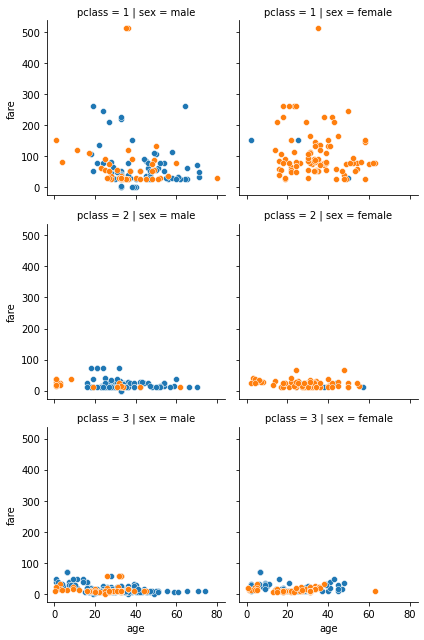

In [58]:
grid = sns.FacetGrid(
    data=titanic,
    row='pclass',
    col='sex',
    hue='survived'
)
grid.map(sns.scatterplot, 'age', 'fare')

In [59]:
filter1 = titanic['sex'] == 'female'
filter2 = titanic['pclass'] < 3
(filter1 & filter2)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [60]:
titanic['female_from_2nd_class'] = (filter1 & filter2)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,female_from_2nd_class
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,F,Southampton,no,False,"(15, 25]",False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,"(35, 45]",True
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,F,Southampton,yes,True,"(25, 35]",False
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,"(25, 35]",True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,F,Southampton,no,True,"(25, 35]",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,F,Southampton,no,True,"(25, 35]",False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,"(15, 25]",True
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,False,F,Southampton,no,False,"(25, 35]",False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,"(25, 35]",False


### Biến đổi phân phối: Tạo biến bằng Z-score

<AxesSubplot:xlabel='fare', ylabel='Count'>

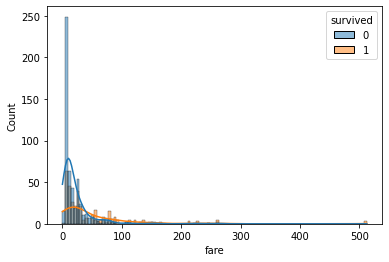

In [61]:
sns.histplot(titanic, x='fare', hue='survived', kde=True)

In [62]:
np.log(1000000000000)

27.631021115928547

In [63]:
np.log(10)

2.302585092994046

In [64]:
np.log(0) # e mũ x

c:\users\tram\anaconda3\envs\tramng\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [65]:
np.log(-1)

c:\users\tram\anaconda3\envs\tramng\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


nan

In [66]:
np.log1p(0)

0.0

In [67]:
ser = np.log1p(titanic['fare'])
ser

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
886    2.639057
887    3.433987
888    3.196630
889    3.433987
890    2.169054
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

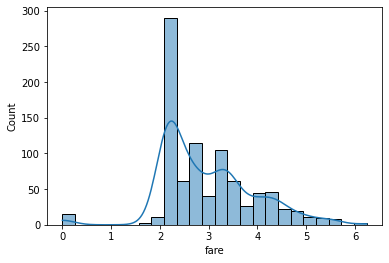

In [68]:
sns.histplot(ser, kde=True)

In [69]:
# Tính z-score
ser.mean(), ser.std()

(2.9622457416890815, 0.9690482701223673)

In [70]:
new_ser = (ser - ser.mean())/ser.std()
new_ser

0     -0.879247
1      1.360456
2     -0.798092
3      1.061442
4     -0.783739
         ...   
886   -0.333511
887    0.486809
888    0.241871
889    0.486809
890   -0.818527
Name: fare, Length: 891, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

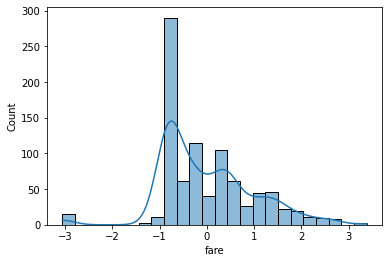

In [71]:
sns.histplot(new_ser, kde=True)

In [72]:
# standardize --> vì tất cả phân phối chuyển về các giá trị từ -3 đến 3

In [73]:
new_ser.mean(), new_ser.std()

(-1.8740464972348322e-16, 1.0)

In [74]:
## Data Sampling

In [75]:
# Tinh ti le survived

In [76]:
# Random sampling

In [77]:
# Sampling vs Bootstrap

In [78]:
# Sampling bang scikit learn

In [79]:
# 2**2 = 4 --> log2(4) = 2 --> log lấy ra số mũ
# log e -> e là hằn số ~ 2.718
# e**x = ??? --> ln(???) = x
# log(1000*(10**9)) ~ 27 --> e**27 = 1000 tỷ
# e**2.7 ~ 10

## Build model


##Categorical variable

In [80]:
titanic['sex'].map({'female':1, 'male':0})

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: sex, Length: 891, dtype: int64

In [81]:
titanic['sex_encoded']=titanic['sex'].eq('female').astype(int)


In [82]:
ser = titanic['deck'].map({
    'A':'ABC',
    'B':'ABC',
    'C':'ABC',
    'D':'DEFG',
    'E':'DEFG',
    'F':'DEFG',
    'G':'DEFG'
})
ser ## cach 1

0      DEFG
1       ABC
2      DEFG
3       ABC
4      DEFG
       ... 
886    DEFG
887     ABC
888    DEFG
889     ABC
890    DEFG
Name: deck, Length: 891, dtype: object

In [83]:
titanic['deck_ABC'] = titanic['deck'].isin(['A','B','C'])

In [84]:
pd.get_dummies(ser)

,ABC,DEFG
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,0,1
889,1,0


In [88]:
get_dummies = pd.get_dummies(titanic[['embark_town','who']]) #one hot encoding, gop nhung gia tri it quan sat vao lam 1
get_dummies

,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
0,0,0,1,0,1,0
1,1,0,0,0,0,1
2,0,0,1,0,0,1
3,0,0,1,0,0,1
4,0,0,1,0,1,0
...,...,...,...,...,...,...
886,0,0,1,0,1,0
887,0,0,1,0,0,1
888,0,0,1,0,0,1
889,1,0,0,0,1,0


In [86]:
titanic['age_group'] = titanic['age_group'].astype(str) \
    .str.strip('()[]') \
    .str.replace(', ', '_') # cách viết mượn của pyspark
titanic['age_group']


0      15_25
1      35_45
2      25_35
3      25_35
4      25_35
       ...  
886    25_35
887    15_25
888    25_35
889    25_35
890    25_35
Name: age_group, Length: 891, dtype: object

In [90]:
titanic_new = titanic.join(get_dummies)
titanic_new

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,age_group,female_from_2nd_class,sex_encoded,deck_ABC,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,...,15_25,False,0,False,0,0,1,0,1,0
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,...,35_45,True,1,True,1,0,0,0,0,1
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,...,25_35,False,1,False,0,0,1,0,0,1
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,...,25_35,True,1,True,0,0,1,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,...,25_35,False,0,False,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,...,25_35,False,0,False,0,0,1,0,1,0
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,...,15_25,True,1,True,0,0,1,0,0,1
888,0,3,female,31.333333,1,2,23.4500,S,Third,woman,...,25_35,False,1,False,0,0,1,0,0,1
889,1,1,male,26.000000,0,0,30.0000,C,First,man,...,25_35,False,0,True,1,0,0,0,1,0


In [91]:
for col in ['adult_male', 'alone', 'female_from_2nd_class']:
    titanic_new[col] = titanic_new[col].astype(int)

In [92]:
from sklearn.model_selection import train_test_split

In [94]:
titanic_new.columns[:15]

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [97]:
training_data = titanic_new.drop(columns=[
    'sex', 
    'fare',
    'embarked', 
    'class', 
    'who', 
    'deck', 
    'embark_town',
    'alive',
    'age_group'
])

In [99]:
display(
training_data.info(), 
training_data.head()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 891 non-null    int64  
 1   pclass                   891 non-null    int64  
 2   age                      891 non-null    float64
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   adult_male               891 non-null    int32  
 6   alone                    891 non-null    int32  
 7   female_from_2nd_class    891 non-null    int32  
 8   sex_encoded              891 non-null    int32  
 9   deck_ABC                 891 non-null    bool   
 10  embark_town_Cherbourg    891 non-null    uint8  
 11  embark_town_Queenstown   891 non-null    uint8  
 12  embark_town_Southampton  891 non-null    uint8  
 13  who_child                891 non-null    uint8  
 14  who_man                  8

None

,survived,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,sex_encoded,deck_ABC,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
0,0,3,22.0,1,0,1,0,0,0,False,0,0,1,0,1,0
1,1,1,38.0,1,0,0,0,1,1,True,1,0,0,0,0,1
2,1,3,26.0,0,0,0,1,0,1,False,0,0,1,0,0,1
3,1,1,35.0,1,0,0,0,1,1,True,0,0,1,0,0,1
4,0,3,35.0,0,0,1,1,0,0,False,0,0,1,0,1,0


In [98]:
train,test = train_test_split(training_data, random_state=420) 
display(
    train, 
    test
)

,survived,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,sex_encoded,deck_ABC,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
254,0,3,41.000000,0,2,0,0,0,1,False,0,0,1,0,0,1
451,0,3,32.701923,1,0,1,0,0,0,False,0,0,1,0,1,0
785,0,3,25.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
311,1,1,18.000000,2,2,0,0,1,1,True,1,0,0,0,0,1
19,1,3,31.084211,0,0,0,1,0,1,False,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1,1,21.000000,0,0,0,1,1,1,False,0,0,1,0,0,1
799,0,3,30.000000,1,1,0,0,0,1,False,0,0,1,0,0,1
575,0,3,19.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
390,1,1,36.000000,1,2,1,0,0,0,True,0,0,1,0,1,0


,survived,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,sex_encoded,deck_ABC,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
722,0,2,34.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
885,0,3,39.000000,0,5,0,0,0,1,False,0,1,0,0,0,1
289,1,3,22.000000,0,0,0,1,0,1,False,0,1,0,0,0,1
131,0,3,20.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
615,1,2,24.000000,1,2,0,0,1,1,False,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,0,3,32.973597,0,0,1,1,0,0,False,1,0,0,0,1,0
531,0,3,32.973597,0,0,1,1,0,0,False,1,0,0,0,1,0
209,1,1,40.000000,0,0,1,1,0,0,True,1,0,0,0,1,0
860,0,3,41.000000,2,0,1,0,0,0,False,0,0,1,0,1,0


In [100]:
# X_data = training_data.drop(columns=['survived'])
# Y_data = training_data['survived']
X_data, Y_data = training_data.drop(columns=['survived']), training_data['survived']
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, random_state=420, test_size=0.2)

display(
    x_train, x_test, y_train, y_test
)

,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,sex_encoded,deck_ABC,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
299,1,50.000000,0,1,0,0,1,1,True,1,0,0,0,0,1
523,1,44.000000,0,1,0,0,1,1,True,1,0,0,0,0,1
564,3,31.084211,0,0,0,1,0,1,False,0,0,1,0,0,1
175,3,18.000000,1,1,1,0,0,0,False,0,0,1,0,1,0
883,2,28.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,1,21.000000,0,0,0,1,1,1,False,0,0,1,0,0,1
799,3,30.000000,1,1,0,0,0,1,False,0,0,1,0,0,1
575,3,19.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
390,1,36.000000,1,2,1,0,0,0,True,0,0,1,0,1,0


,pclass,age,sibsp,parch,adult_male,alone,female_from_2nd_class,sex_encoded,deck_ABC,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,who_child,who_man,who_woman
722,2,34.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
885,3,39.000000,0,5,0,0,0,1,False,0,1,0,0,0,1
289,3,22.000000,0,0,0,1,0,1,False,0,1,0,0,0,1
131,3,20.000000,0,0,1,1,0,0,False,0,0,1,0,1,0
615,2,24.000000,1,2,0,0,1,1,False,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,3,32.701923,1,0,1,0,0,0,False,0,0,1,0,1,0
183,2,1.000000,2,1,0,0,0,0,False,0,0,1,1,0,0
153,3,40.500000,0,2,1,0,0,0,False,0,0,1,0,1,0
556,1,48.000000,1,0,0,0,1,1,True,1,0,0,0,0,1


299    1
523    1
564    0
175    0
883    0
      ..
627    1
799    0
575    0
390    1
72     0
Name: survived, Length: 712, dtype: int64

722    0
885    0
289    1
131    0
615    1
      ..
490    0
183    1
153    0
556    1
208    1
Name: survived, Length: 179, dtype: int64

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
clr = LogisticRegression(
    max_iter=10000 #gia tri mac dinh = 100 thi bao warning ko tim dc dap an
)
clr.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

LogisticRegression(max_iter=10000)

In [103]:
from sklearn import metrics

In [111]:
y_pred=clr.predict(x_test)

In [112]:
metrics.accuracy_score(y_test, y_pred)

0.8156424581005587

<AxesSubplot:>

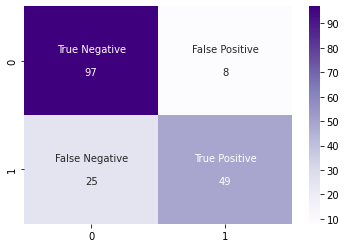

In [113]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
labels = np.asarray([f'{i}\n\n{j}' for i, j in zip(names, cf_matrix.flatten())])
sns.heatmap(cf_matrix, annot=labels.reshape(2, 2), cmap='Purples', fmt='')


In [114]:
clr.coef_[0]

array([-0.76434474, -0.0200413 , -0.62532769, -0.29853786, -0.94948525,
       -0.70713599,  1.75309596, -0.13933831,  0.04427037,  0.11475251,
        0.23674349, -0.34413453,  0.60538518, -0.94948525,  0.35146153])